# ***Thrust timeline***
---

* import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

* Datafile bringing

In [65]:
data = pd.read_csv('fft_thrust20220612_121047.txt',sep='\t')
data.set_index('t [s]')

,T [N]
t [s],
0.0001,4.465538
0.0002,4.436067
0.0003,4.406573
0.0004,4.377055
0.0005,4.347517
...,...
134.1496,4.612482
134.1497,4.583153
134.1498,4.553792


* Time cutting

In [3]:
data = pd.read_csv('fft_thrust20220612_121047.txt',sep='\t')

Tmax = data['T [N]'].max()

for i in np.arange(data['T [N]'].idxmax(),-1,-1):
    if data['T [N]'][i] < 1.0e-5:
        i+=1
        break
for j in np.arange(data['T [N]'].idxmax(),len(data),1):
    if data['T [N]'][j] < Tmax * 0.015:
        j-=1
        break

print(f"original time: {data['t [s]'][i]} ~ {data['t [s]'][j]}")

t0 = data['t [s]'][i-1]
data['t [s]'] = data['t [s]'] - t0

data = data[i:j]
data.to_csv('I260_2022.06.12.csv',index=None)
data.set_index('t [s]')

original time: 106.3101 ~ 108.6234


,T [N]
t [s],
0.0001,0.362943
0.0002,1.180233
0.0003,2.008105
0.0004,2.846559
0.0005,3.695594
...,...
2.3129,7.827973
2.3130,7.817849
2.3131,7.807796


* graph

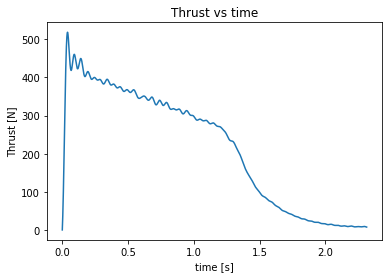

In [67]:
data = pd.read_csv('I260_2022.06.12.csv')

plt.plot(data['t [s]'],data['T [N]'])
plt.title('Thrust vs time')
plt.xlabel('time [s]')
plt.ylabel('Thrust [N]')
plt.show()

* thrust max

In [68]:
T_idxmax = data['T [N]'].idxmax()

print(f"\
Thrust_max = {data['T [N]'][T_idxmax]}[N]\n\
         t = {data['t [s]'][T_idxmax]}[s]")

Thrust_max = 518.2092448212345[N]
         t = 0.0397999999999996[s]


---
# operating time

In [69]:
data = data = pd.read_csv('I260_2022.06.12.csv')

Tmax = data['T [N]'].max()

for i in np.arange(data['T [N]'].idxmax(),-1,-1):
    if data['T [N]'][i] < Tmax * 0.05:
        i+=1
        t1 = data['t [s]'][i]
        break
for j in np.arange(data['T [N]'].idxmax(),len(data),1):
    if data['T [N]'][j] < Tmax * 0.05:
        j-=1
        t2 = data['t [s]'][j]
        break
print(f't1 = {t1}[s]\nt2 = {t2}[s]\noperating time = {t2 - t1}[s]')

t1 = 0.0027999999999934[s]
t2 = 1.8584999999999925[s]
operating time = 1.855699999999999[s]


* Total impulse & mean thrust & thrust max

In [70]:
data = data = pd.read_csv('I260_2022.06.12.csv')

Tmax = data['T [N]'].max()

for i in np.arange(data['T [N]'].idxmax(),-1,-1):
    if data['T [N]'][i] < Tmax * 0.05:
        i+=1
        t1 = data['t [s]'][i]
        break
for j in np.arange(data['T [N]'].idxmax(),len(data),1):
    if data['T [N]'][j] < Tmax * 0.05:
        j-=1
        t2 = data['t [s]'][j]
        break

Total_T = 0
for n in np.arange(i,j,1):
    dt = round(data['t [s]'][n+1] - data['t [s]'][n],10)
    dT = data['T [N]'][n]
    
    Ts =dt * dT
    Total_T += Ts

print(f"\
Total impulse : {Total_T} [Ns]\n\
mean thrust   : {data['T [N]'][i:j].mean()} [N]\n")

Total impulse : 496.0658967185912 [Ns]
mean thrust   : 267.3200930746308 [N]



* dT/dt define

In [71]:
# for n in np.arange(0,len(data)-1,1):
#     dT = round((data['T [N]'][n+1] - data['T [N]'][n]) / (data['t [s]'][n+1] - data['t [s]'][n]),10)
#     print(dT)

---
# burning time

In [72]:
data = data = pd.read_csv('I260_2022.06.12.csv')

Tmax = data['T [N]'].max()

for i in np.arange(data['T [N]'].idxmax(),-1,-1):
    if data['T [N]'][i] < Tmax * 0.05:
        i+=1
        t1 = data['t [s]'][i]
        break
for j in np.arange(data['T [N]'].idxmax(),len(data),1):
    if data['T [N]'][j] < Tmax * 0.05:
        j-=1
        t2 = data['t [s]'][j]
        break

for k in np.arange(data['T [N]'].idxmax(),len(data),1):
    if data['T [N]'][k] <= data['T [N]'][i:j].mean()*0.75:
        if (data['T [N]'][k+1] - data['T [N]'][k])/(data['t [s]'][k+1] - data['t [s]'][k]) <= 0:
            if (data['T [N]'][k+2] - data['T [N]'][k+1])/(data['t [s]'][k+2] - data['t [s]'][k+1]) <= 0:
                if (data['T [N]'][k+3] - data['T [N]'][k+2])/(data['t [s]'][k+3] - data['t [s]'][k+2]) <= 0:
                    k-=1
                    t3 = data['t [s]'][k]
                    break

print(f't1 = {t1}[s]\nt2 = {t3}[s]\nburing time = {t3 - t1}[s]')

t1 = 0.0027999999999934[s]
t2 = 1.3464999999999918[s]
buring time = 1.3436999999999983[s]


In [73]:
data = data = pd.read_csv('I260_2022.06.12.csv')

Tmax = data['T [N]'].max()

for i in np.arange(data['T [N]'].idxmax(),-1,-1):
    if data['T [N]'][i] < Tmax * 0.05:
        i+=1
        t1 = data['t [s]'][i]
        break
for j in np.arange(data['T [N]'].idxmax(),len(data),1):
    if data['T [N]'][j] < Tmax * 0.05:
        j-=1
        t2 = data['t [s]'][j]
        break
# for k in np.arange(len(data)-1,0,-1):
for k in np.arange(data['T [N]'].idxmax(),len(data),1):
    if data['T [N]'][k] <= data['T [N]'][i:j].mean()*0.75:
        if (data['T [N]'][k] - data['T [N]'][k])/(data['t [s]'][k+1] - data['t [s]'][k]) <= 0:
            if (data['T [N]'][k+2] - data['T [N]'][k+1])/(data['t [s]'][k+2] - data['t [s]'][k+1]) <= 0:
                if (data['T [N]'][k+3] - data['T [N]'][k+2])/(data['t [s]'][k+3] - data['t [s]'][k+2]) <= 0:
                    k-=1
                    t3 = data['t [s]'][k]
                    break

Total_T = 0
for n in np.arange(i,k,1):
    dt = round(data['t [s]'][n+1] - data['t [s]'][n],10)
    dT = data['T [N]'][n]
    
    Ts = dt * dT
    Total_T += Ts

print(f"\
Total impulse : {Total_T} [Ns]\n\
mean thrust   : {data['T [N]'][i:k].mean()} [N]\n")

print(data['T [N]'][i])
print(data['T [N]'][k])

print(data['t [s]'][i])
print(data['t [s]'][k])

Total impulse : 454.2818195810583 [Ns]
mean thrust   : 338.08277114017983 [N]

26.12812413506017
200.4965574175
0.0027999999999934
1.3464999999999918
